## Data Preprocessing in Machine Learning ⭐

The goal is simple: **prepare raw data so our model can learn patterns instead of noise**.

**The Complete  Data Preprocessing Pipeline:**

1️⃣ **Data Collection**

You gather raw data from:

- CSV files
- Databases
- APIs
- Web scraping
- Sensors, logs
- Data warehouses (Snowflake, BigQuery, etc.)

No preprocessing yet — just collecting.

In [11]:
import pandas as pd

df = pd.read_csv("sleep_gym.csv")

In [12]:
print(df.head())

   user_id  hours_sleep  energy_level  went_gym
0        1          7.5             8         1
1        2          5.0             4         0
2        3          6.0             6         1
3        4          4.5             3         0
4        5          8.0             9         1


2️⃣ **Data Understanding / Exploration (EDA = Exploratory Data Analysis)**

Before cleaning anything, you look at (analyze) your data to understand it.

You check:

- What each column means
- Which columns are numeric, categorical, text, dates
- Shape of dataset
- Missing values
- Outliers
- Distribution of each feature
- Correlations

Tools:

- df.info(), df.describe()
- Histograms
- Boxplots
- Pairplots
- Correlation matrix

This helps you decide what cleaning/transformation is needed.

--

**❗IMPORTANT:**
**EDA — Understanding the Dataset’s Nature and Context**

Before performing any cleaning, scaling, or transformation, **it is crucial to understand the nature of the dataset** you’re working with. EDA is not just about generating plots and summaries — **it’s about understanding the context in which the data was collected** and **what each feature truly represents**.

Many preprocessing steps (like dropping columns, filling missing values, removing outliers, or smoothing noisy data) can accidentally delete **meaningful information** if you don’t understand this context.

For example:

- A “missing” value might actually mean the event didn’t happen (not an error).
- A “weird” value might be rare but important (fraud detection, medical anomalies).
- An outlier might represent a critical edge case rather than noise.
- A categorical label with only a few samples might be a rare but valid class.

Therefore, a major part of EDA is to make sure you understand:

- How the data was collected
- What each feature means
- Why some values may be missing or extreme
- Whether irregularities are errors or meaningful signals

Only after understanding the story behind the data can you decide the right preprocessing steps.

In [16]:
print("Shape:", df.shape) # how many rows & cols

Shape: (10, 4)


In [17]:
print(df.info()) # data types & missing values (if any)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10 non-null     int64  
 1   hours_sleep   10 non-null     float64
 2   energy_level  10 non-null     int64  
 3   went_gym      10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes
None


In [18]:
print(df.describe()) # mean, std, min, max, quartiles for numeric cols

        user_id  hours_sleep  energy_level   went_gym
count  10.00000    10.000000     10.000000  10.000000
mean    5.50000     6.250000      6.100000   0.600000
std     3.02765     1.687371      2.514403   0.516398
min     1.00000     3.500000      2.000000   0.000000
25%     3.25000     5.125000      4.250000   0.000000
50%     5.50000     6.250000      6.500000   1.000000
75%     7.75000     7.375000      8.000000   1.000000
max    10.00000     9.000000      9.000000   1.000000


In [21]:
# check target distribution

print(df["went_gym"].value_counts())
print(df["went_gym"].value_counts(normalize=True))

went_gym
1    6
0    4
Name: count, dtype: int64
went_gym
1    0.6
0    0.4
Name: proportion, dtype: float64


In [25]:
# look for missing values

print(df.isna())
print()
print(df.isna().sum())

   user_id  hours_sleep  energy_level  went_gym
0    False        False         False     False
1    False        False         False     False
2    False        False         False     False
3    False        False         False     False
4    False        False         False     False
5    False        False         False     False
6    False        False         False     False
7    False        False         False     False
8    False        False         False     False
9    False        False         False     False

user_id         0
hours_sleep     0
energy_level    0
went_gym        0
dtype: int64


In [27]:
print(df["hours_sleep"].describe())
print()
print(df["energy_level"].describe())

count    10.000000
mean      6.250000
std       1.687371
min       3.500000
25%       5.125000
50%       6.250000
75%       7.375000
max       9.000000
Name: hours_sleep, dtype: float64

count    10.000000
mean      6.100000
std       2.514403
min       2.000000
25%       4.250000
50%       6.500000
75%       8.000000
max       9.000000
Name: energy_level, dtype: float64


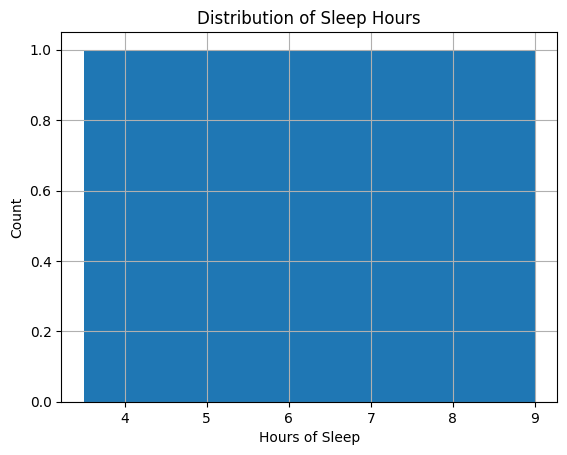

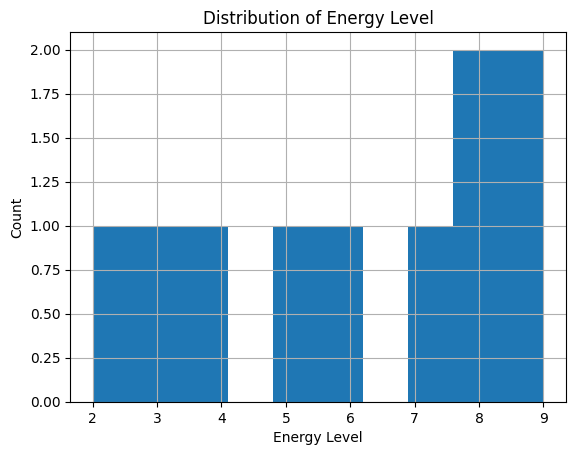

In [29]:
import matplotlib.pyplot as plt

df["hours_sleep"].hist(bins=10)
plt.xlabel("Hours of Sleep")
plt.ylabel("Count")
plt.title("Distribution of Sleep Hours")
plt.show()

df["energy_level"].hist(bins=10)
plt.xlabel("Energy Level")
plt.ylabel("Count")
plt.title("Distribution of Energy Level")
plt.show()

In [30]:
print(df.groupby("went_gym")["hours_sleep"].mean())
print(df.groupby("went_gym")["energy_level"].mean())

went_gym
0    4.625000
1    7.333333
Name: hours_sleep, dtype: float64
went_gym
0    3.500000
1    7.833333
Name: energy_level, dtype: float64


In [31]:
print(df.corr(numeric_only=True))

               user_id  hours_sleep  energy_level  went_gym
user_id       1.000000     0.114183      0.167847  0.071067
hours_sleep   0.114183     1.000000      0.975525  0.828850
energy_level  0.167847     0.975525      1.000000  0.889962
went_gym      0.071067     0.828850      0.889962  1.000000


3️⃣ **Data Cleaning**

This is the biggest and most important part.

Includes:

**✔ Handling Missing Values**

Ways:

- Delete rows/columns (if too many missing)
- Fill with mean/median (numeric)
- Fill with mode (categorical)
- Forward/backward fill (time series)
- Use models to predict missing values

**✔ Handling Noise / Errors**

Examples:

- Wrong values (“age = 300”)
- Duplicates
- Typos (“Male”, “male”, “MALE”)

**✔ Outlier Detection**

Methods:

- Z-Score
- IQR
- Isolation Forest
- Boxplot inspection

You either remove, cap, or transform outliers.

**✔ Data Type Corrections**

- Converting strings → dates
- Strings → categories
- Float → int
- Object type → numeric

In [32]:
df.duplicated().sum()

0

In [33]:
df = df.drop_duplicates()

In [34]:
df.isna().sum()

user_id         0
hours_sleep     0
energy_level    0
went_gym        0
dtype: int64

- Fill missing values (if any) with median (median is robust to outliers)

In [35]:
df["hours_sleep"] = df["hours_sleep"].fillna(df["hours_sleep"].median())

In [36]:
df["energy_level"] = df["energy_level"].fillna(df["energy_level"].median())

- Check for inconsistencies

In [ ]:
# validate sleep hours

df[df["hours_sleep"] < 0]

,user_id,hours_sleep,energy_level,went_gym


In [39]:
# validate energy levels

df[df["energy_level"] > 10]

,user_id,hours_sleep,energy_level,went_gym


In [40]:
# correction example

df.loc[df["energy_level"] > 10, "energy_level"] = 10

- Detect & handle outliers

In [41]:
Q1 = df["hours_sleep"].quantile(0.25)
Q3 = df["hours_sleep"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df[(df["hours_sleep"] < lower) | (df["hours_sleep"] > upper)]

,user_id,hours_sleep,energy_level,went_gym


In [42]:
# if outliers exist:

# 1 - remove them
df = df[df["hours_sleep"].between(lower, upper)]

# 2 - cap
df["hours_sleep"] = df["hours_sleep"].clip(lower, upper)

# 3 - keep them (if meaningful)

- Correct data types

In [43]:
df.dtypes

user_id           int64
hours_sleep     float64
energy_level      int64
went_gym          int64
dtype: object

In [44]:
df["hours_sleep"] = df["hours_sleep"].astype(float)
df["energy_level"] = df["energy_level"].astype(int)
df["went_gym"] = df["went_gym"].astype(int)

In [49]:
# Final checks

print(df.isna().sum())            # should be all zeros
print()            
print(df.describe())              # check ranges again
print()    
print(df)                  # quick inspection

user_id         0
hours_sleep     0
energy_level    0
went_gym        0
dtype: int64

        user_id  hours_sleep  energy_level   went_gym
count  10.00000    10.000000     10.000000  10.000000
mean    5.50000     6.250000      6.100000   0.600000
std     3.02765     1.687371      2.514403   0.516398
min     1.00000     3.500000      2.000000   0.000000
25%     3.25000     5.125000      4.250000   0.000000
50%     5.50000     6.250000      6.500000   1.000000
75%     7.75000     7.375000      8.000000   1.000000
max    10.00000     9.000000      9.000000   1.000000

   user_id  hours_sleep  energy_level  went_gym
0        1          7.5             8         1
1        2          5.0             4         0
2        3          6.0             6         1
3        4          4.5             3         0
4        5          8.0             9         1
5        6          3.5             2         0
6        7          9.0             9         1
7        8          6.5             7      

4️⃣ **Data Integration (if you have multiple data sources)**

When data comes from different places, you must integrate it.

Tasks:

- Merge tables (SQL joins)
- Resolve inconsistencies across systems
    - Different names ("user_id" vs "uid")
    - Different units (kg vs lbs)
    - Different formats (timestamps)
- Detect duplicate records across datasets

Example:

User info in MySQL + user activity in MongoDB → must combine into a single dataset.

5️⃣ **Data Transformation**

This prepares the data for the algorithm.

**✔ Scaling / Normalization**

Used for algorithms sensitive to distance:

- KNN
- SVM
- Logistic Regression
- Neural Networks
- K-means

Methods:

- Standardization
- Min-Max scaling


**✔ Encoding Categorical Variables**

For ML:

- One-hot encoding (small categories)
- Label encoding (ordinal data)
- Target encoding (for large cardinality)

**✔ Binning**

- Converting numeric data to categories (e.g. Age → Age groups).

**✔ Feature Construction**

Creating new important variables:

- BMI = weight / height²
- Day of week from date
- Length of text input
- Interaction terms (feature1 × feature2)

**✔ Text preprocessing**

- Tokenization
- Lowercasing
- Stopword removal
- Lemmatization
- TF-IDF
- Embeddings (Word2Vec, BERT)

**✔ Time-series preprocessing**

- Creating lags
- Rolling means
- Seasonality decomposition
- Differencing (for stationarity)

6️⃣ **Data Reduction (optional but useful)**

This step makes data smaller, faster, and cleaner.

**✔ Dimensionality Reductio**

- PCA
- t-SNE
- UMAP

**✔ Feature Selection**

- Filter methods (correlation, chi-square)
- Wrapper methods (RFE)
- Embedded methods (Lasso)

**✔ Sampling**

- Downsampling
- Upsampling (SMOTE for classification)

Useful when dataset is extremely large or imbalanced.

7️⃣ **Train-Test Split**

You must separate the data to evaluate fairly.

Typical:

- Train: 70–80%
- Test: 20–30%

Sometimes also:

- Validation set
- K-fold cross-validation

8️⃣ **Final Preprocessing Pipeline (for production)**

You package everything into a data pipeline (sklearn Pipeline):

✔ Scaling
✔ Encoding
✔ Imputation
✔ Feature selection
✔ Model

This ensures:

- No data leakage
- Reproducibility
- Cleaner code
- Same transformation in training & prediction